In [1]:
from saliency_zoo import fast_ig,guided_ig
from torchvision.models.inception import inception_v3,Inception_V3_Weights
import torch.nn as nn
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from utils.visualization import HeatmapVisualizer,visualize
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mask_viz = HeatmapVisualizer(blur=7, normalization_type="signed_max")
import matplotlib.pyplot as plt

In [2]:
model = inception_v3(weights=Inception_V3_Weights.DEFAULT).eval().to(device)
sm = nn.Softmax(dim=-1)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
norm_layer = transforms.Normalize(mean, std)
sm = nn.Softmax(dim=-1)
model = nn.Sequential(norm_layer, model, sm).to(device)

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [4]:
def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')
    
img = pil_loader("images/water-bird.jpeg")
img = transform(img).unsqueeze(0).to(device)


In [5]:
data = img
target = torch.tensor([129]).to(device)

In [6]:
target

tensor([129])

In [7]:
model(data).argmax(-1)

tensor([129])

In [8]:
attribution = guided_ig(model, data, target)

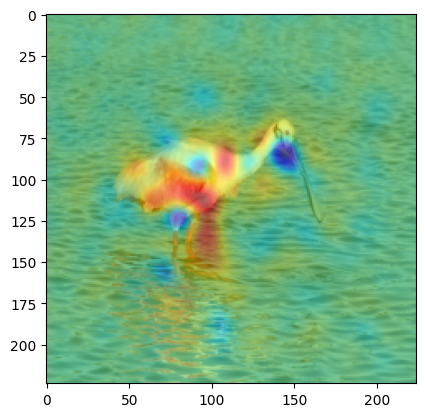

In [9]:
im_, mask = mask_viz(attribution[np.newaxis,:,:,:], data.cpu().detach(
).numpy(), overlay_opacity=0.5, imshow=False, return_tiled=True)
plt.figure()
plt.imshow(im_)
plt.imshow(mask, alpha=0.5, cmap='jet')
plt.show()